# Interact Exercise 3

## Imports

In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [2]:
from ipywidgets import interact, interactive, fixed
from IPython.display import display

# Using interact for animation with data

A [*soliton*](http://en.wikipedia.org/wiki/Soliton) is a constant velocity wave that maintains its shape as it propagates. They arise from non-linear wave equations, such has the [Korteweg–de Vries](http://en.wikipedia.org/wiki/Korteweg%E2%80%93de_Vries_equation) equation, which has the following analytical solution:

$$
\phi(x,t) = \frac{1}{2} c \mathrm{sech}^2 \left[ \frac{\sqrt{c}}{2} \left(x - ct - a \right) \right]
$$

The constant `c` is the velocity and the constant `a` is the initial location of the soliton.

Define `soliton(x, t, c, a)` function that computes the value of the soliton wave for the given arguments. Your function should work when the postion `x` *or* `t` are NumPy arrays, in which case it should return a NumPy array itself.

In [3]:
def soliton(x, t, c, a):
    """Return phi(x, t) for a soliton wave with constants c and a."""
    coeff = .5 * c
    cosh = np.cosh((c**(-.5)*.5)*(x - c * t - a))
    f = 1 / np.power(cosh, 2)
    phi = coeff * f
    return phi

In [4]:
assert np.allclose(soliton(np.array([0]),0.0,1.0,0.0), np.array([0.5]))

To create an animation of a soliton propagating in time, we are going to precompute the soliton data and store it in a 2d array. To set this up, we create the following variables and arrays:

In [5]:
tmin = 0.0
tmax = 10.0
tpoints = 100
t = np.linspace(tmin, tmax, tpoints)

xmin = 0.0
xmax = 10.0
xpoints = 200
x = np.linspace(xmin, xmax, xpoints)

c = 1.0
a = 0.0

Compute a 2d NumPy array called `phi`:

* It should have a dtype of `float`.
* It should have a shape of `(xpoints, tpoints)`.
* `phi[i,j]` should contain the value $\phi(x[i],t[j])$.
* If you choose to you `np.meshgrid` be careful about the `indexing` argument.

In [6]:
xn, tn = np.meshgrid(x, t, indexing='ij')

In [7]:
phi = soliton(xn, tn, c, a)

In [8]:
assert phi.shape==(xpoints, tpoints)
assert phi.ndim==2
assert phi.dtype==np.dtype(float)
assert phi[0,0]==soliton(x[0],t[0],c,a)

Write a `plot_soliton_data(i)` function that plots the soliton wave $\phi(x, t[i])$. Customize your plot to make it effective and beautiful.

In [9]:
phi[0][20]

0.20677227481064278

In [10]:
phi.shape

(200, 100)

In [11]:
def plot_soliton_data(i=0):
    """Plot the soliton data at t[i] versus x."""
    xdim, ydim = phi.shape
    phiL = [phi[j][i] for j in range(0, xdim)]
    plt.plot(x, phiL)
    plt.grid(axis='y')
    plt.axes().set(title="Soliton at a Time t vs. Position", 
                   xlabel = "Position", 
                   ylabel = "Soliton Value")

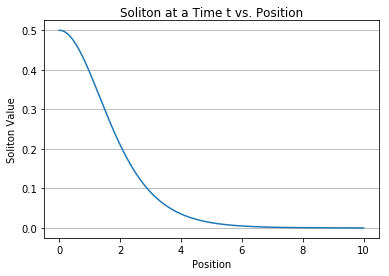

In [12]:
plot_soliton_data()

Use `interact` to animate the `plot_soliton_data` function versus time.

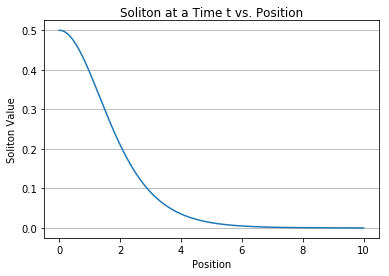

In [13]:
interact(plot_soliton_data, i=(0, 100));

The following is a cool plot for your, the grader's, pleasure :)

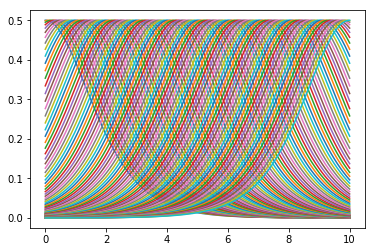

In [14]:
plt.plot(x, phi);